In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly.graph_objs as go
import warnings
import os
import plotly as py

In [48]:
#1.Ресурс:
#      https://www.kaggle.com/datasets/vivovinco/nba-player-stats

In [49]:
#2a. Предметная область - Сезон НБА 2020/2021, источник - НБА, Характер данных - реальный
#2b. В датасете представленны имена игроков(тип строчный) и их статистика за 36 минут на площадке

In [50]:
df = pd.read_csv('nba2021_per36min.csv')
#Будем исследовать низависимые данные статистики лиги, поэтому уберем их датасета эти данные:

df.pop('Player')#ФИО игрока
df.pop('Tm')#Команда игрока
df.pop('FG')#Количество попаданий игрока в кольцо
df.pop('FGA')#Количество бросков игрока
df.pop('2P')#Количество попаданий игрока в кольцо с ценой попадания 2 очка
df.pop('2PA')#Количество бросков игрока в кольцо с ценой попадания 2 очка
df.pop('3P')#Количество попаданий игрока в кольцо с ценой попадания 3 очка
df.pop('3PA')#Количество бросков игрока в кольцо с ценой попадания 3 очка
df.pop('FT')#Количество попаданий игрока в кольцо со штрафного
df.pop('FTA')#Количество бросков игрока в кольцо со штрафного
df.pop('ORB')#Подборы игрока в атаке
df.pop('DRB')##Подборы игрока в защите
df.pop('MP')#Минуты игрока на площадке
df.pop('PF')

0      4.8
1      2.1
2      2.4
3      2.8
4      2.0
      ... 
492    1.3
493    4.1
494    2.1
495    3.7
496    4.8
Name: PF, Length: 497, dtype: float64

In [51]:
df
#Age - Возраст игрока
#Pos - Позиция игрока
#G - Количество сыгранных игр
#GS - Количество сыгранных игр в стартовой пятерке
#FG% - Количество попаданий от количества бросков 
#3P% - Количество попаданий из-за дуги от количества бросков из-за дуги
#2P% - Количество попаданий двухочкового броска от количества двухочковых бросков
#FT% - Количество попаданий со штрафного от количества бросков со штрафного
#TRB - Полное количество выигранных подборов
#AST - Количество ассистов
#STL - Количество удачных перехватов мяча
#BLK - Количество заблокированных бросков
#TOV - Количество потерь
#PF - Нарушения правил
#PTS - Количество очков за матч

,Pos,Age,G,GS,FG%,3P%,2P%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,PF,21,28,2,0.590,0.000,0.590,0.561,9.9,1.5,1.1,1.3,2.6,16.0
1,PG,24,6,0,0.125,0.000,0.167,0.000,6.4,4.2,0.0,0.0,0.0,4.2
2,C,27,27,27,0.603,0.000,0.606,0.468,11.3,2.7,1.2,0.7,2.2,10.3
3,C,23,26,26,0.573,0.400,0.576,0.841,9.9,5.7,1.0,1.1,3.2,21.4
4,C,35,18,18,0.476,0.358,0.525,0.762,5.9,2.6,0.5,1.2,1.2,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,SG,28,28,23,0.456,0.353,0.500,0.785,5.7,6.0,1.7,0.7,1.5,12.9
493,PF,32,23,0,0.587,0.238,0.628,0.500,8.1,6.1,1.9,0.7,2.9,15.7
494,PG,22,26,26,0.429,0.369,0.462,0.887,4.0,9.6,0.8,0.3,4.4,27.5
495,C,28,15,12,0.525,0.188,0.577,0.759,12.0,3.7,1.0,0.9,1.4,15.1


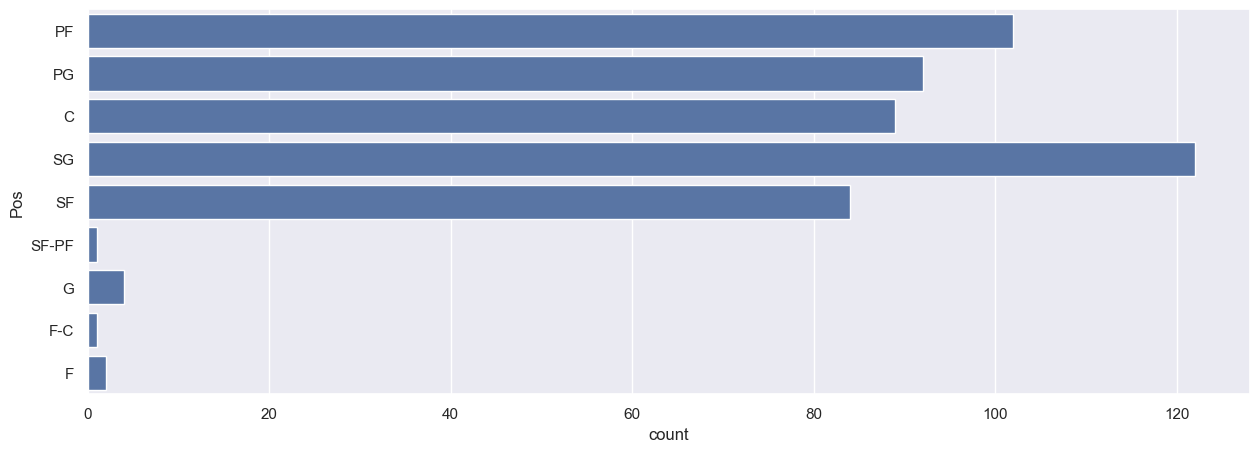

In [52]:
#Гистограмма количества занимаемых позиций в лиге.
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Pos' , data = df)
plt.show()

#Анализируя гистограмму можно сделать вывод о том, что классическая тактика игры в баскетболл отходит на задний план.
#На данный момент в лиге существует запрос на разыгрывающего(PG) и бросающего(SG) защитника, вокруг которых строится команда.
#В нынешнее время необходим игрок, который будет контролировать и строить игру.

C:\Users\bylookjr\AppData\Local\Temp\ipykernel_6224\356893091.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age', ylabel='Density'>

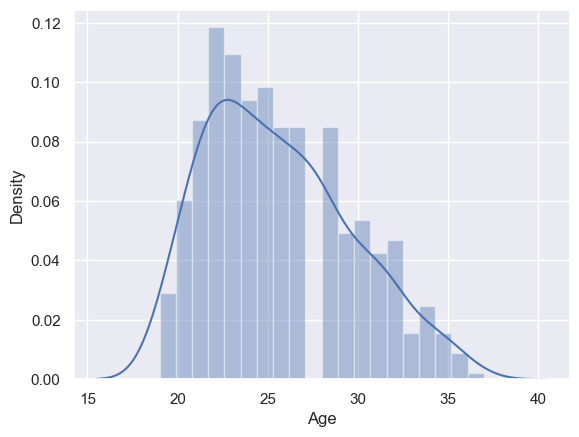

In [53]:
sns.distplot(df['Age'] , bins = 20)
#По гистограмме можно заметить распределение с отрицательной ассиметрией.
#Это соответсвует тому, что каждый год проводят NBA DRAFT, события на котором в лигу принимают 90 новых игроков возрастом 18-21 год, тем самым
#увеличивая плотность молодых игроков в лиге.

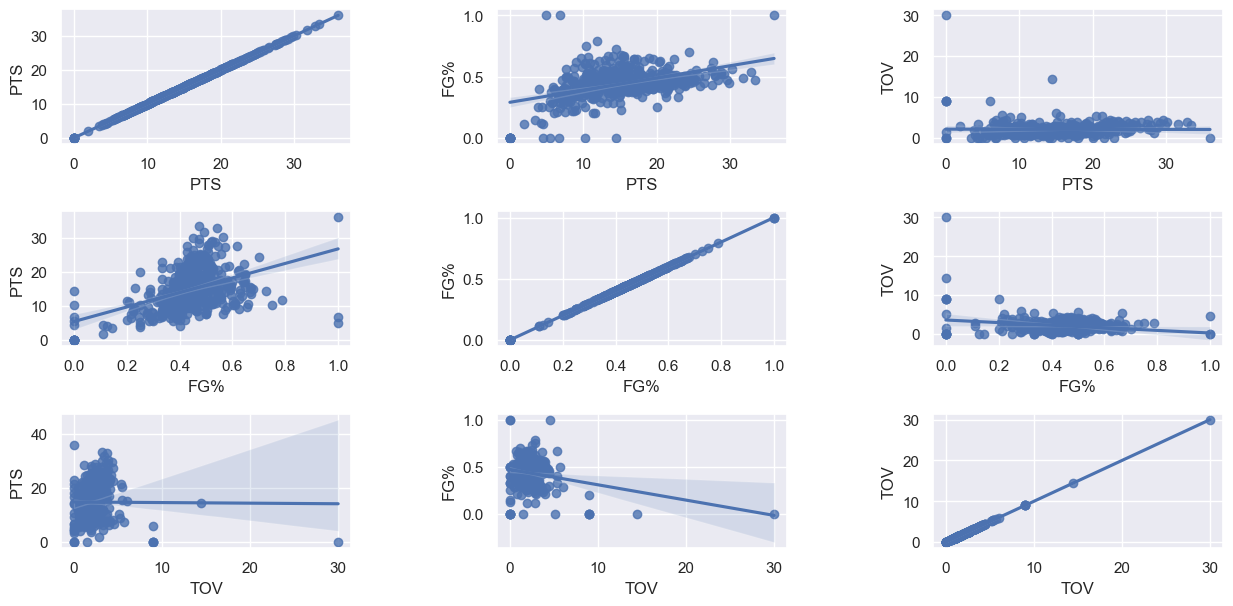

In [54]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['PTS', 'FG%','TOV']:
    for y in ['PTS', 'FG%','TOV']:
        n += 1
        plt.subplot(3 ,3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()
#Рассматривая зависимость процента попаданий (FG%) от набраных очков(PTS) можно сделать вывод что, чем больше игрок
#набирает очков, тем больше у него процент попадания. 

#Рассматривая зависимость количества потерь (TOV) от набраных очков(PTS) можно сделать вывод что, чем больше игрок
#набирает очков, тем меньше у него потерь. Это связано с тем, что игроки, которые набирают много очков, мало отдают передач, тем самым 
#уменьшая шанс на потерю. А их промахи в кольцо рассчитывают не как потерю, а как "бросок мимо".

#Рассматривая зависимость процента попаданий (FG%) от количества потерь (TOV) можно сделать вывод что, чем лучше
#игрок попадает в кольцо, тем меньше у него количество потерь. Стоит принять в сведение, что процент попаданий выше 60% аномален для лиги,
#такой процент имеют игроки, которые выходят на несколько минут на площадку(мяч до них порой попросту не доходит)
#и делают 1-2 броска за игру, следовательно, у них меньше шанс сделать ошибку.

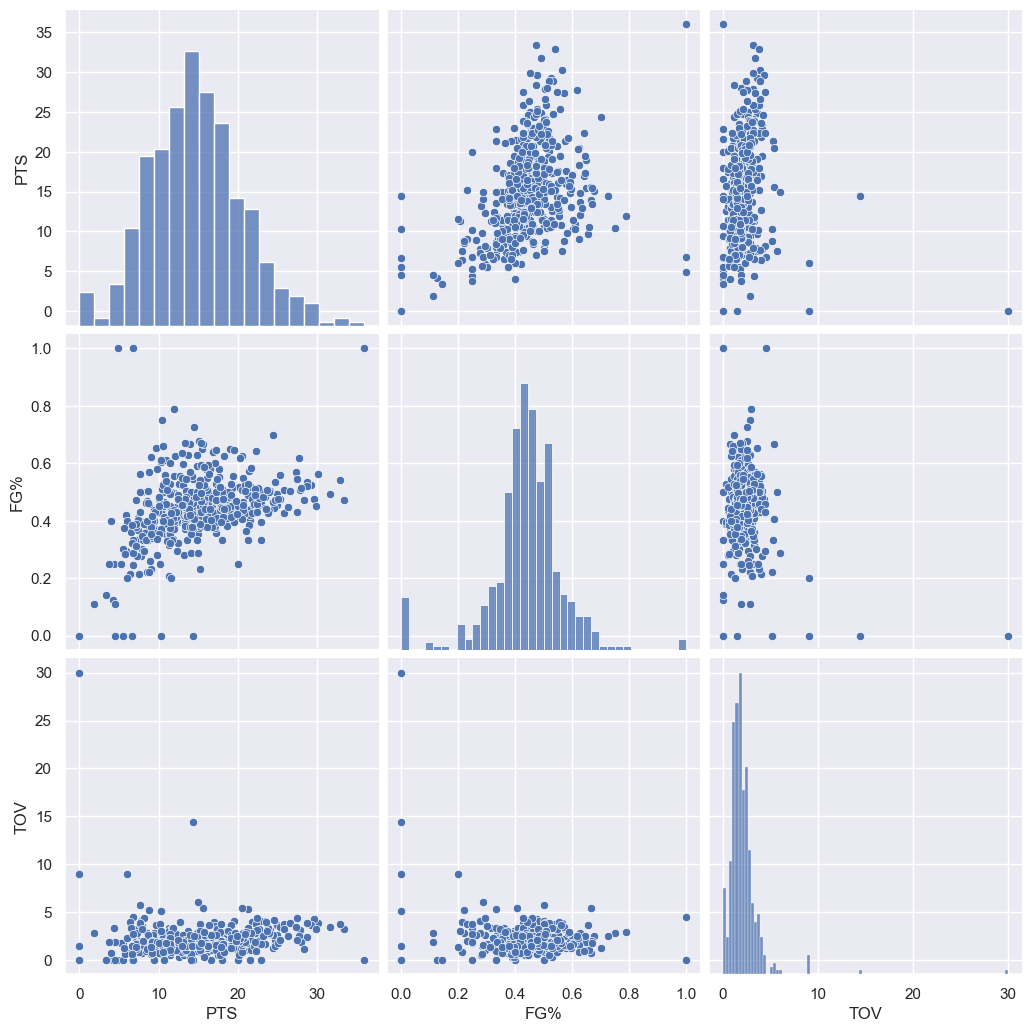

In [55]:
sns.set()
cols = ['PTS', 'FG%','TOV']
sns.pairplot(df[cols], height = 3.5)
plt.show();
#Аналогия к предыдущему пункту.

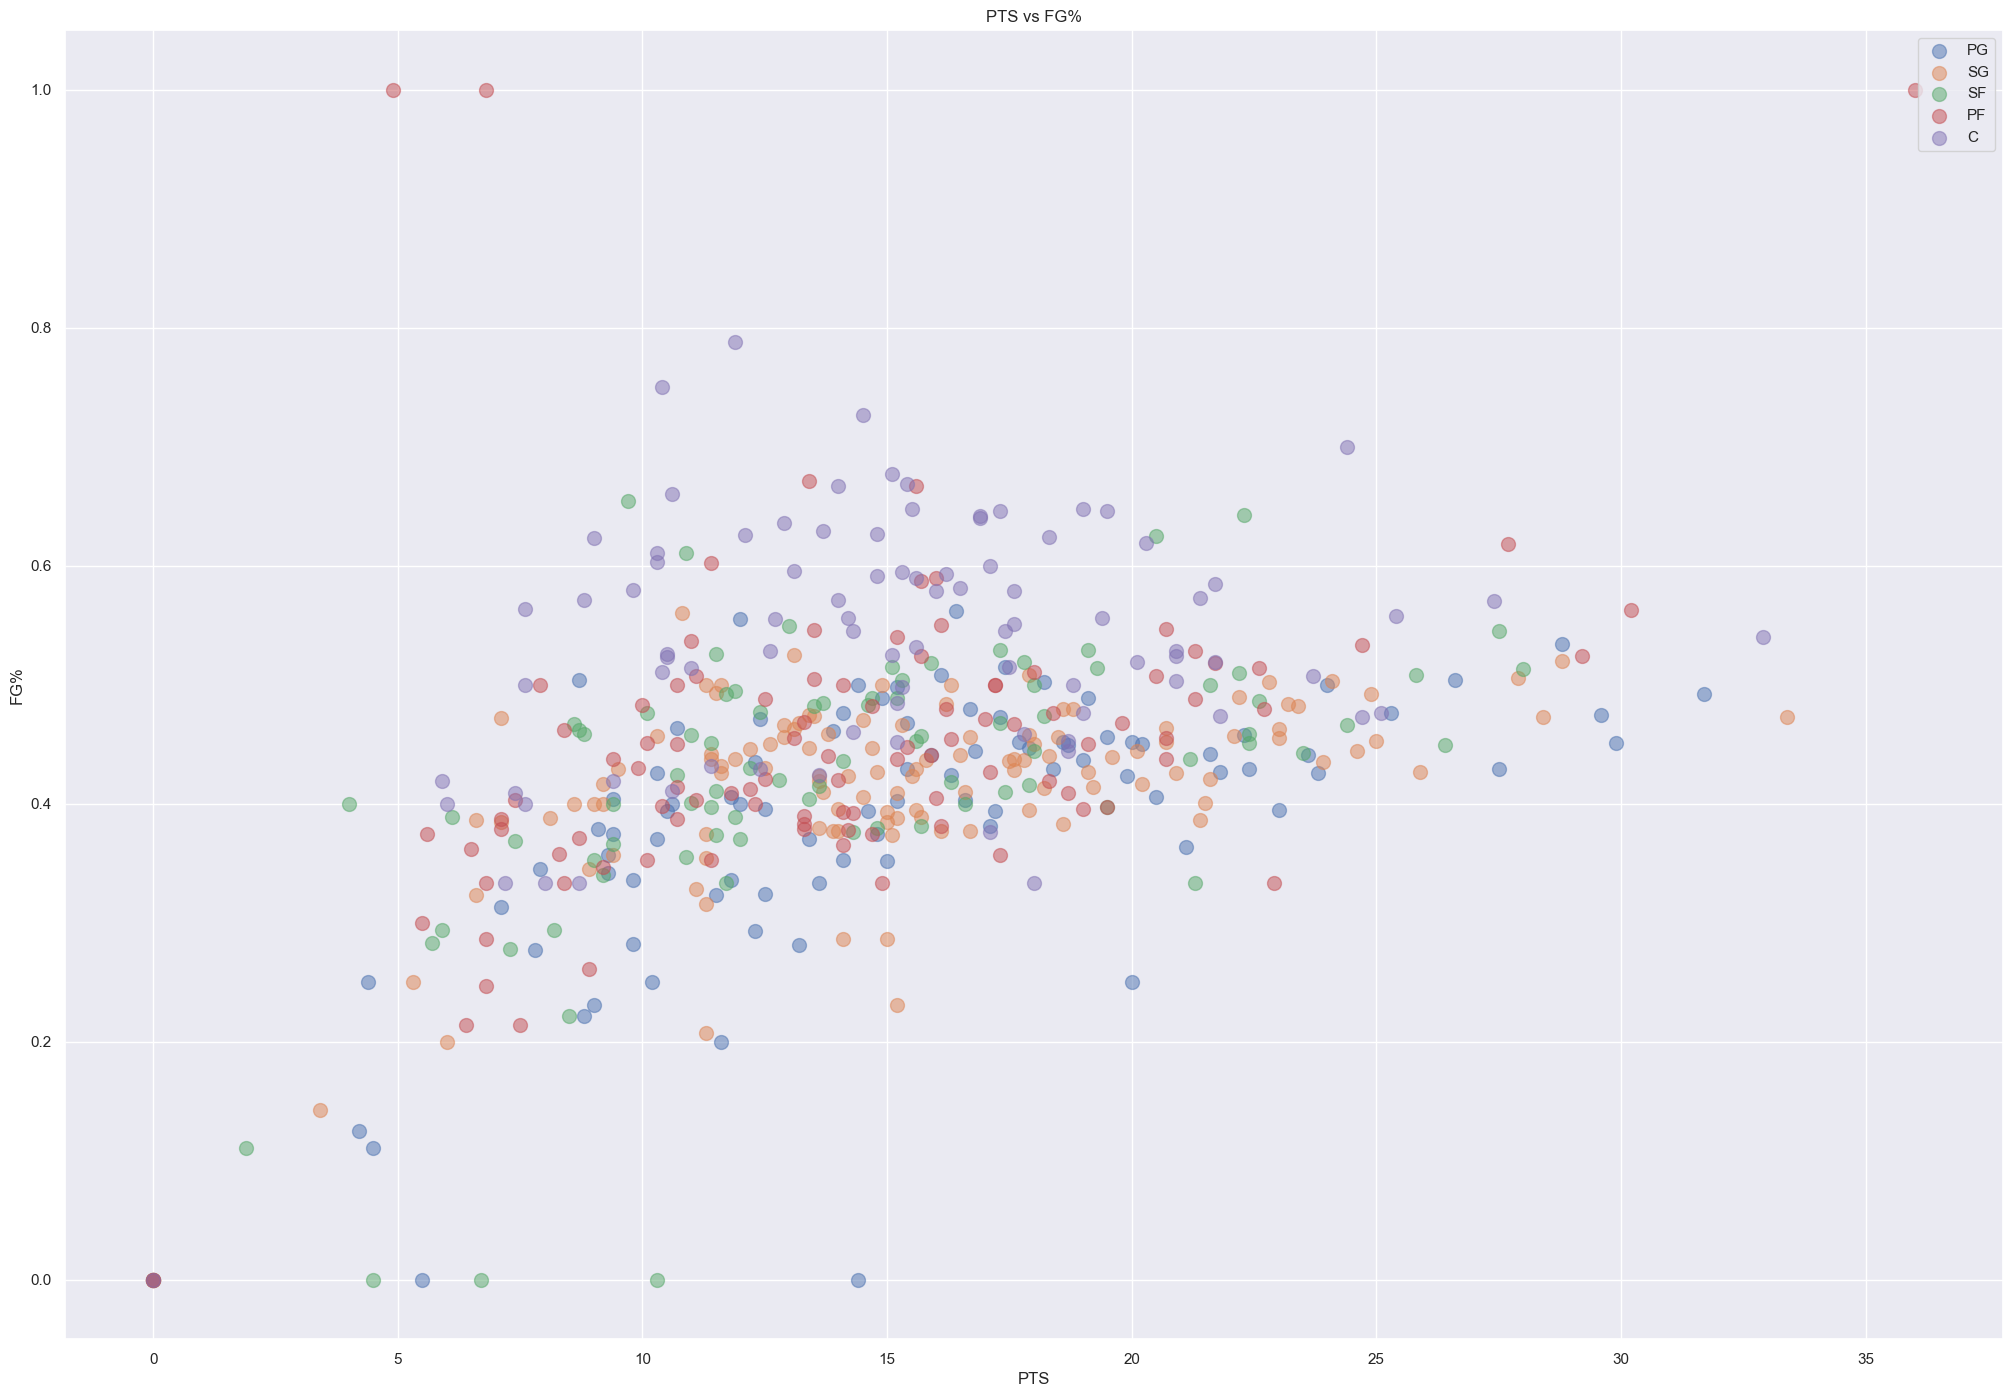

In [56]:
plt.figure(1 , figsize = (25 , 17))
for type in ['PG' , 'SG','SF' , 'PF', 'C']:
    plt.scatter(x = 'PTS' , y = 'FG%' , data = df[df['Pos'] == type] ,
                s = 100 , alpha = 0.5 , label = type)
plt.xlabel('PTS'), plt.ylabel('FG%') 
plt.title('PTS vs FG%')
plt.legend()
plt.show()
# Рассматривая график можно заметить, что большинство данных распределено у значения 0,5% FG%.

C:\Users\bylookjr\AppData\Local\Temp\ipykernel_6224\1182281687.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




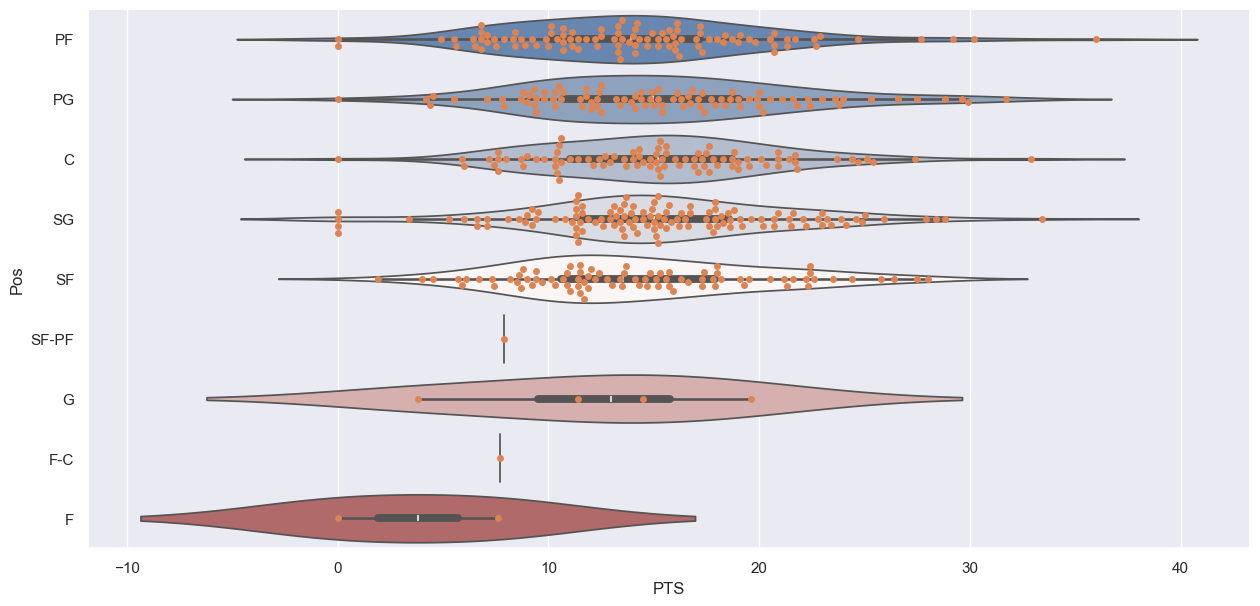

In [57]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in [ 'PTS' ]:
    n += 1 
    plt.subplot(1 , 1 , n)
    plt.subplots_adjust(hspace = 0.1 , wspace = 0.1)
    sns.violinplot(x = cols , y = 'Pos' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Pos' , data = df)
    plt.ylabel('Pos' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

C:\Users\bylookjr\PythoN\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



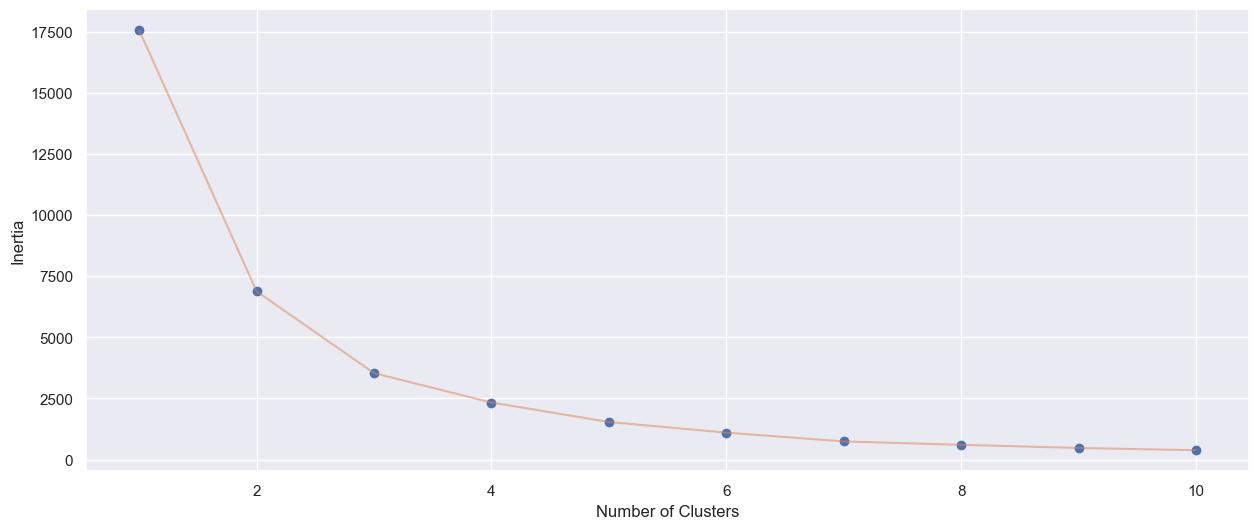

In [58]:
from sklearn.cluster import KMeans
X1 = df[['PTS' , 'FG%']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)


plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

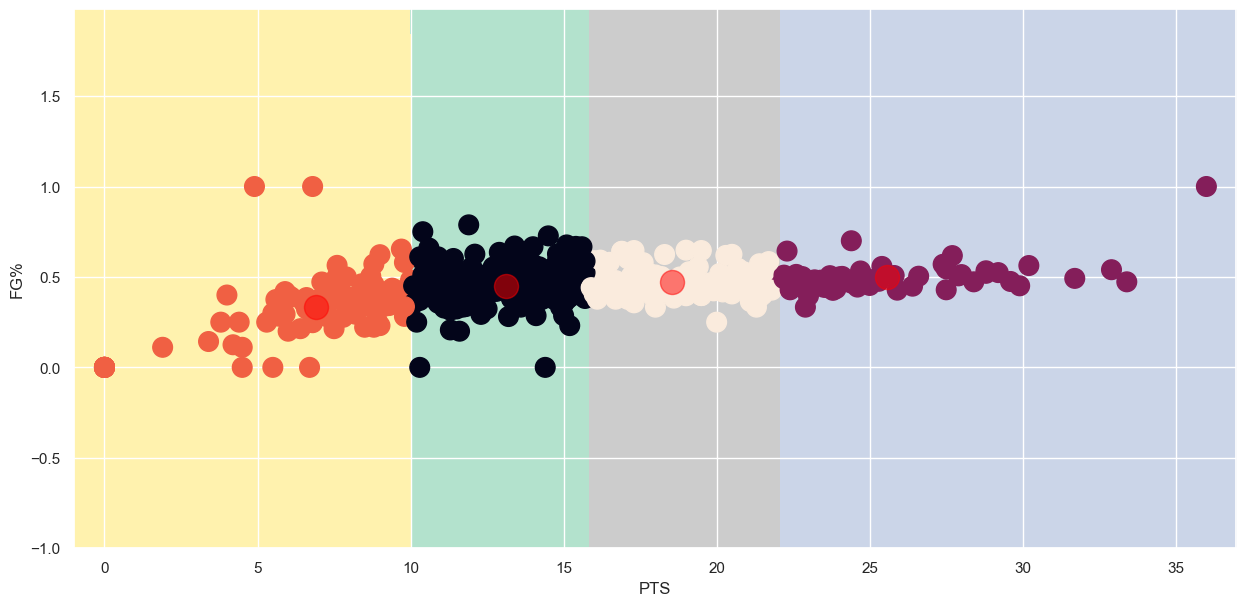

In [59]:
#Рассмотрим кластеризацию используя количество очков и процент попаданий
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'PTS' ,y = 'FG%' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('FG%') , plt.xlabel('PTS')
plt.show()

C:\Users\bylookjr\PythoN\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



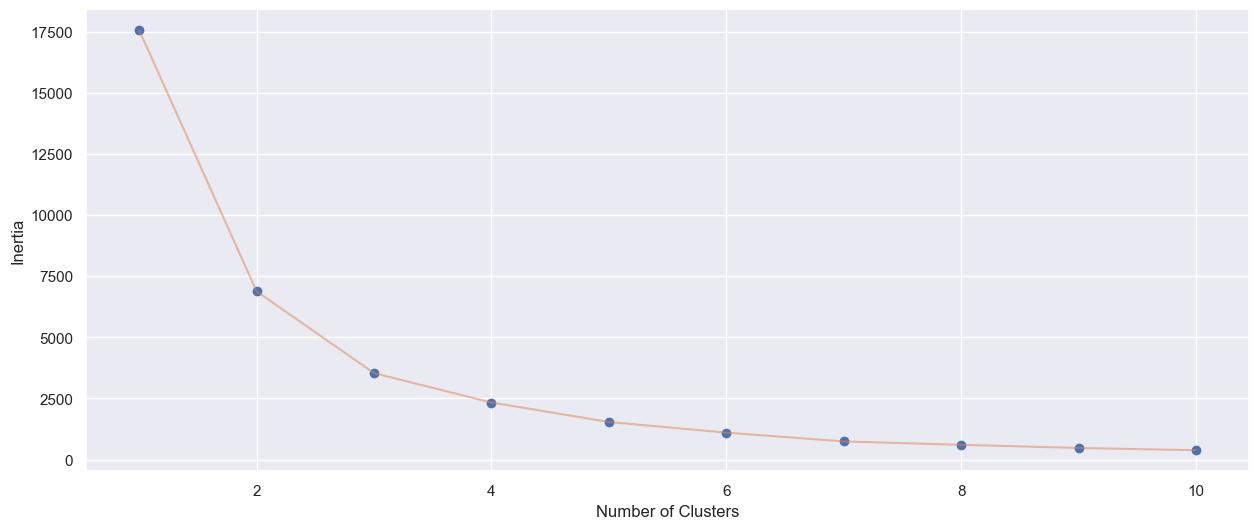

In [60]:
X2 = df[['PTS' , 'FG%','TOV']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

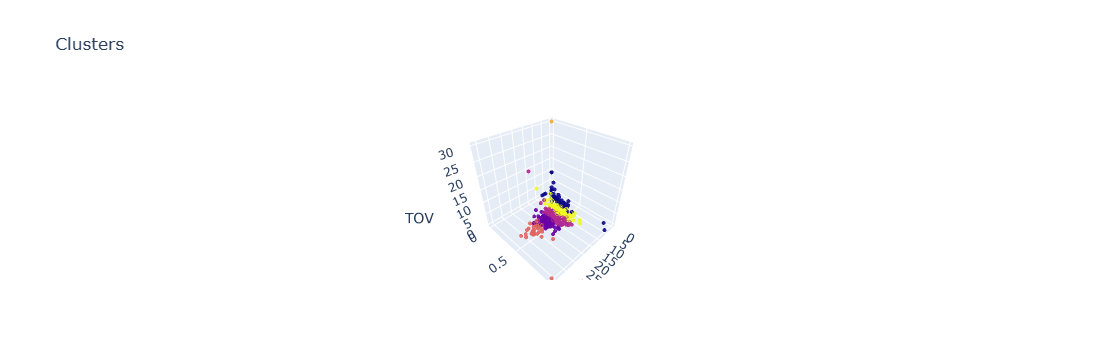

In [61]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['PTS'],
    y= df['FG%'],
    z= df['TOV'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 2,
        line=dict(
            color= df['label3'],
            width= 20
        ),
        opacity=0.9
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'PTS'),
            yaxis = dict(title  = 'FG%'),
            zaxis = dict(title  = 'TOV')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
#Трехмерное изображение зависимости количества очков, нарущений правил и процента попаданий

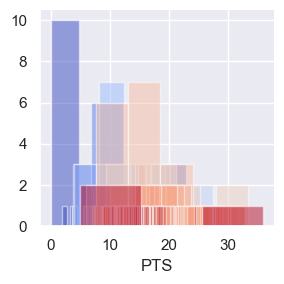

In [62]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="FG%",palette='coolwarm')
g = g.map(plt.hist,'PTS',bins=3,alpha=0.5)

In [63]:
# Находим игроков по критерию: больше 15 очков за игру
df[df['PTS'] > 15.0]


,Pos,Age,G,GS,FG%,3P%,2P%,FT%,TRB,AST,STL,BLK,TOV,PTS,label3
0,PF,21,28,2,0.590,0.000,0.590,0.561,9.9,1.5,1.1,1.3,2.6,16.0,2
3,C,23,26,26,0.573,0.400,0.576,0.841,9.9,5.7,1.0,1.1,3.2,21.4,1
4,C,35,18,18,0.476,0.358,0.525,0.762,5.9,2.6,0.5,1.2,1.2,19.0,1
6,SG,22,23,3,0.410,0.276,0.525,0.781,5.0,3.8,2.0,0.7,2.4,16.6,2
7,SG,25,19,8,0.429,0.436,0.410,0.892,4.4,3.1,1.5,0.2,1.6,15.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,SF,21,6,0,0.545,0.333,0.625,0.000,16.9,0.0,0.0,0.0,2.1,27.5,3
493,PF,32,23,0,0.587,0.238,0.628,0.500,8.1,6.1,1.9,0.7,2.9,15.7,2
494,PG,22,26,26,0.429,0.369,0.462,0.887,4.0,9.6,0.8,0.3,4.4,27.5,3
495,C,28,15,12,0.525,0.188,0.577,0.759,12.0,3.7,1.0,0.9,1.4,15.1,2


In [66]:
new_df = df[['PTS','Age','FG%','AST']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(new_df)

len(kmeans.labels_)
new_df['cluster'] = kmeans.labels_
new_df.groupby(['cluster']).mean()

#Разбиение игроков на кластеры

C:\Users\bylookjr\PythoN\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\bylookjr\AppData\Local\Temp\ipykernel_6224\1772366280.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PTS,Age,FG%,AST
cluster,,,,
0,25.586275,24.607843,0.502059,4.388235
1,7.693137,22.852941,0.322716,2.839216
2,11.201042,29.729167,0.462073,3.323958
3,19.146429,30.071429,0.469310,4.147619
4,15.651829,22.981707,0.457598,2.888415


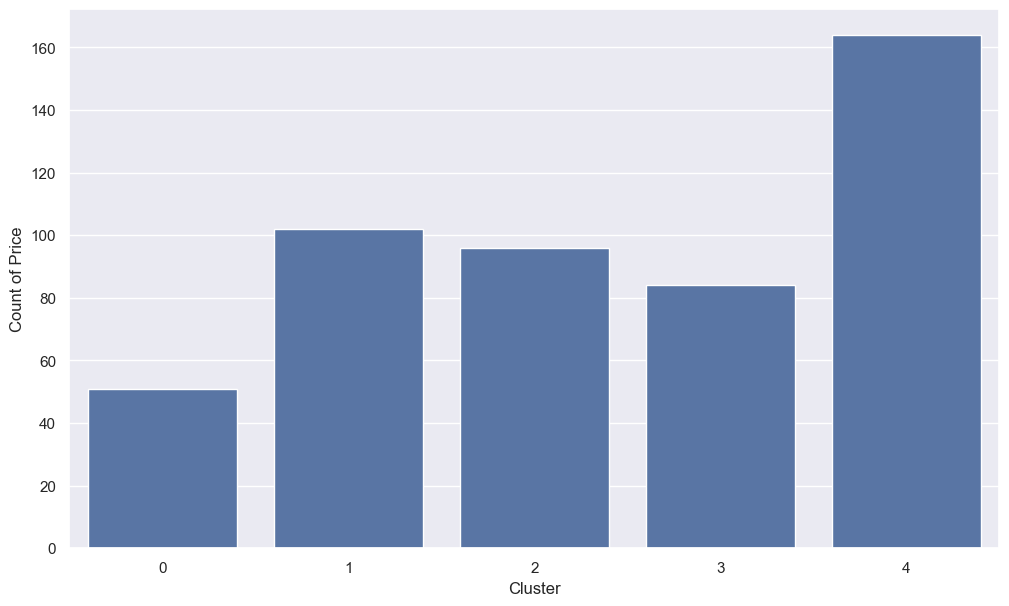

In [68]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=new_df.groupby(['cluster']).count()['Age'].values)
x=axis.set_xlabel("Cluster")
x=axis.set_ylabel("Count of Price")

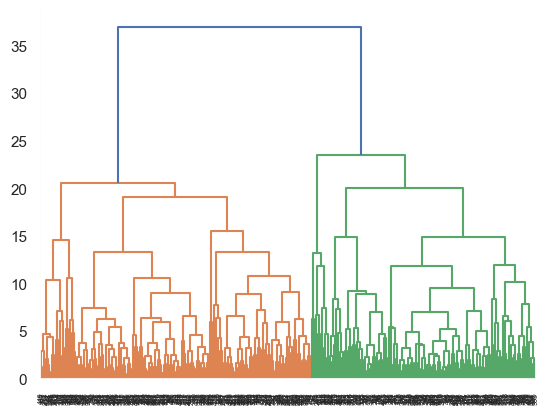

In [69]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# Complete linkage

mergings = linkage(new_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

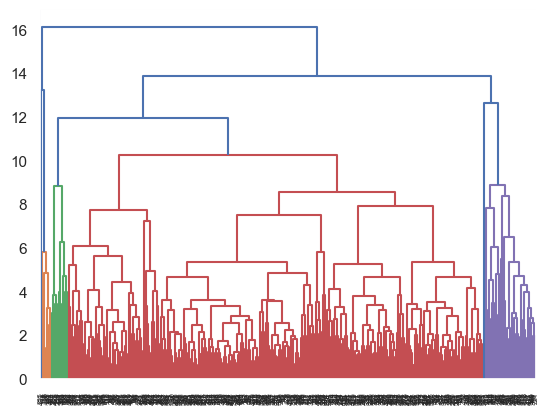

In [70]:
# Average linkage

mergings = linkage(new_df, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()